In [1]:
import sys
import torch
import os
import numpy as np

from torch.distributions.uniform import Uniform

In [2]:
lunarc = 0

In [3]:
print(os.getcwd())

/Users/marvin/projects/AmortizedPL/experiments/two_moons_comparison


In [4]:
import util.functions as func
from sbi.utils import BoxUniform

In [5]:
prior = BoxUniform(low=-1*torch.ones(2), high=1*torch.ones(2))

x_o, model = func.set_up_model(prior,
                              mean_radius=1,
                              sd_radius=0.1,
                              baseoffset=1.0)

x_o = torch.Tensor([0, 0])

#mean_radius=0.1,
#sd_radius=0.01,
#baseoffset=0.25

In [6]:
x_o

tensor([0., 0.])

In [7]:
post_samples = model.gen_posterior_samples(x_o,10000)


In [8]:
post_samples

array([[0.93820124, 1.69084398],
       [1.58071859, 1.08497281],
       [0.30092816, 1.59788481],
       ...,
       [1.23718783, 1.53677697],
       [1.41887325, 1.23514482],
       [1.35971531, 1.31154504]])

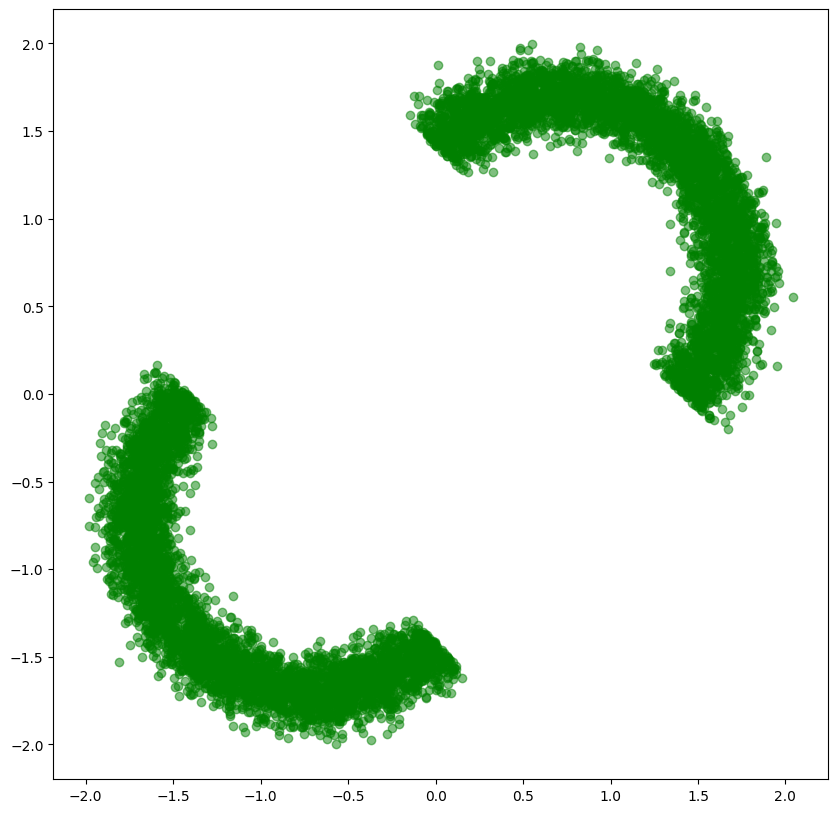

In [10]:
# Plot post samples

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))

plt.scatter(post_samples[:,0],post_samples[:,1],alpha = 0.5,color = "g")
#plt.ylim((-2, 2))
#plt.xlim((-2, 2))

In [13]:
np.savetxt('assets/post_greenberg19_10k.csv', post_samples, delimiter=",")

In [14]:
x_model = model.model_sim(post_samples)

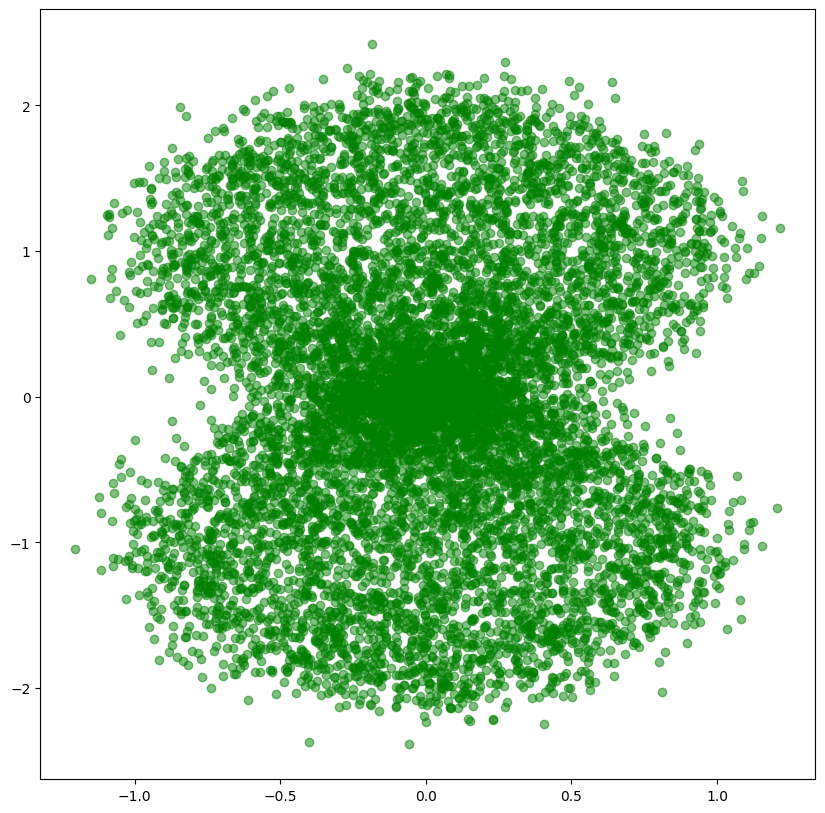

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))

plt.scatter(x_model[:,0],x_model[:,1],alpha = 0.5,color = "g")
#plt.ylim((-2, 3))
#plt.xlim((-2, 2))


In [18]:
dim = 2
seed = 1

import numpy as np

torch.manual_seed(seed)

post_samples = model.gen_posterior_samples(x_o,1000)

np.savetxt('assets/true_posterior.csv', post_samples, delimiter=",")


In [19]:
post_pred = model.model_sim(post_samples)

np.savetxt('assets/true_post_pred.csv', post_pred, delimiter=",")